In [ ]:
import numpy as np
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

BASE_DIR=os.path.dirname(os.getcwd())
DATA_DIR=os.path.join(BASE_DIR,"data")
MODELS_DIR=os.path.join(BASE_DIR,"models")

os.makedirs(MODELS_DIR,exist_ok=True)

df=pd.read_csv(os.path.join(DATA_DIR,"features_data.csv"))

numCol=["textLength","wordCount","key_graph","key_dp","key_greedy","key_bit","key_binary","key_tree","key_lcm","key_modulo","key_prime",
    "key_probability","key_queue","key_stack","key_gcd","key_algorithm","key_prefix","key_suffix"]

X=df[["text"]+numCol]
y=df["problem_score"]

XrTrain,XrTest,yrTrain,yrTest=train_test_split(
    X,y,test_size=0.20,random_state=50
)

preprocessor=ColumnTransformer([
    ("text",TfidfVectorizer(
        max_features=12000,ngram_range=(1,2),
        min_df=5,max_df=0.85,stop_words="english",
        sublinear_tf=True),"text"),
    ("num",StandardScaler(),numCol)
])

In [5]:
rfg=Pipeline([
    ("prep",preprocessor),
    ("model",RandomForestRegressor(
        n_estimators=600,max_depth=None,
        random_state=50,n_jobs=-1))
])

rfg.fit(XrTrain,yrTrain)
pred=rfg.predict(XrTest)
rmse=np.sqrt(mean_squared_error(yrTest,pred))

print("MAE:",mean_absolute_error(yrTest,pred))
print("RMSE:",rmse)

plt.figure()
plt.scatter(yrTest,pred)
plt.plot([min(yrTest),max(yrTest)],[min(yrTest),max(yrTest)])
plt.xlabel("Actual Difficulty")
plt.ylabel("Predicted Difficulty")
plt.title("Actual vs Predicted Scores (Random Forest Regressor)")
plt.show()

KeyboardInterrupt: 

MAE: 1.6947441302637363
RMSE: 2.0246989215060722


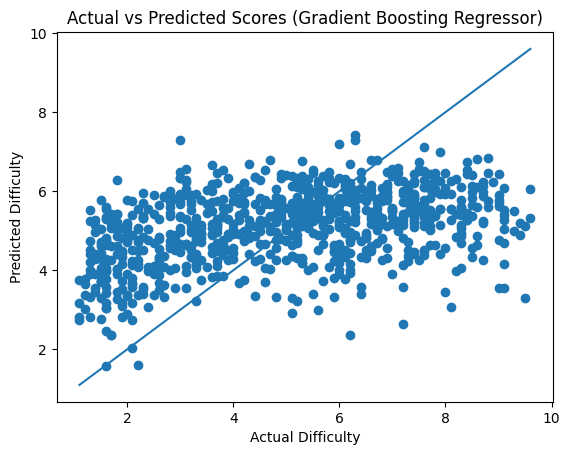

In [26]:
gbr=Pipeline([
    ("preprocess",preprocessor),
    ("model",GradientBoostingRegressor(
        n_estimators=300,learning_rate=0.1,
        max_depth=3,random_state=50))
])

gbr.fit(XrTrain,yrTrain)
pred=gbr.predict(XrTest)
rmse=np.sqrt(mean_squared_error(yrTest,pred))

print("MAE:",mean_absolute_error(yrTest,pred))
print("RMSE:",rmse)

plt.figure()
plt.scatter(yrTest,pred)
plt.plot([min(yrTest),max(yrTest)],[min(yrTest),max(yrTest)])
plt.xlabel("Actual Difficulty")
plt.ylabel("Predicted Difficulty")
plt.title("Actual vs Predicted Scores (Gradient Boosting Regressor)")
plt.show()

MAE: 1.6483395076522422
RMSE: 1.9889106195226198


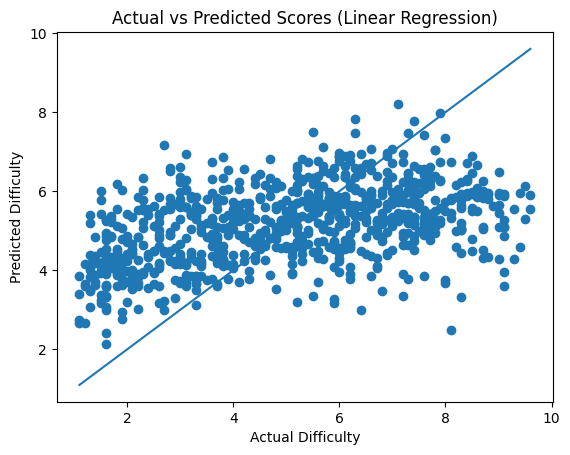

In [ ]:
lr=Pipeline([
    ("preprocess",preprocessor),
    ("model",Ridge(alpha=2.0))
])

lr.fit(XrTrain,yrTrain)
pred=lr.predict(XrTest)
rmse=np.sqrt(mean_squared_error(yrTest,pred))

print("MAE:",mean_absolute_error(yrTest,pred))
print("RMSE:",rmse)

plt.figure()
plt.scatter(yrTest, pred)
plt.plot([min(yrTest),max(yrTest)],[min(yrTest),max(yrTest)])
plt.xlabel("Actual Difficulty")
plt.ylabel("Predicted Difficulty")
plt.title("Actual vs Predicted Scores (Linear Regression)")
plt.show()

with open(os.path.join(MODELS_DIR,"reg_model.pkl"),"wb") as f:
    pickle.dump(lr,f)